<a href="https://colab.research.google.com/github/m-agnet/Portfolio/blob/main/VolumeD_ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 要旨

# 序論

# 本論

## 超球体積の公式を導出

## モンテカルロ法を用いて超球体積を求める手法


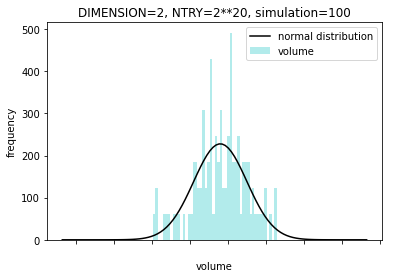

In [1]:
# Code1*. 2次元球の体積についてのヒストグラム, 正規分布. def, njit, DIMENSION=2, NTRY=2**20, simulation=100. execution time_s=2
import random as rd
import math as m
import numpy as np
from numba import njit


@njit(cache=True)
def CalculateNumericalVolume_f(si,DIMENSION):
    rd.seed(si)
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** DIMENSION
    return numerical_volume


@njit(cache=True)
def Simulate_f():
    DIMENSION: int = 2
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    SIMULATE: int = LAST_SEED - FIRST_SEED
    for si in (range(FIRST_SEED, LAST_SEED)):
        numerical_volume = CalculateNumericalVolume_f(si, DIMENSION)
        numerical_volume_num.append(numerical_volume)
    return SIMULATE, numerical_volume_num


SIMULATE, data = Simulate_f()

data_mean = np.mean(data)
data_std = np.std(data)

pi=m.pi
x = np.linspace(pi-0.01,pi+0.01,SIMULATE)
y = np.exp(- (x - data_mean) ** 2 / (2 * data_std ** 2)) / (np.sqrt(2 * np.pi) * data_std)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(data, label="volume", bins=50, histtype="bar", density=True, alpha=0.3, color="c")
ax.plot(x,y,label="normal distribution",color="k")
ax.legend()
plt.xticks(color="None")
plt.title("DIMENSION=2, NTRY=2**20, simulation=100")
plt.xlabel("volume")
plt.ylabel("frequency")
plt.show()

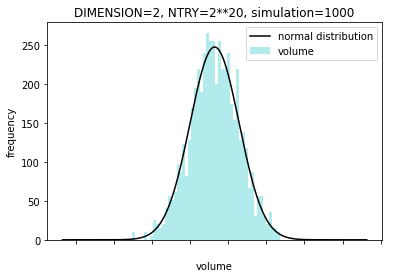

In [2]:
# Code2. 2次元球の体積についてのヒストグラム, 正規分布. def, njit, DIMENSION=2, NTRY=2**20, simulation=1000. execution time_s=20
import random as rd
import math as m
import numpy as np
from numba import njit


@njit(cache=True)
def CalculateNumericalVolume_f(si,DIMENSION):
    rd.seed(si)
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** DIMENSION
    return numerical_volume


@njit(cache=True)
def Simulate_f():
    DIMENSION: int = 2
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 1100
    SIMULATE: int = LAST_SEED - FIRST_SEED
    for si in (range(FIRST_SEED, LAST_SEED)):
        numerical_volume = CalculateNumericalVolume_f(si, DIMENSION)
        numerical_volume_num.append(numerical_volume)
    return SIMULATE, numerical_volume_num


SIMULATE, data = Simulate_f()

data_mean = np.mean(data)
data_std = np.std(data)

pi=m.pi
x = np.linspace(pi-0.01,pi+0.01,SIMULATE)
y = np.exp(- (x - data_mean) ** 2 / (2 * data_std ** 2)) / (np.sqrt(2 * np.pi) * data_std)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(data, label="volume", bins=50, histtype="bar", density=True, alpha=0.3, color="c")
ax.plot(x,y,label="normal distribution",color="k")
ax.legend()
plt.xticks(color="None")
plt.title("DIMENSION=2, NTRY=2**20, simulation=1000")
plt.xlabel("volume")
plt.ylabel("frequency")
plt.show()

In [3]:
# Code3. 2次元球の体積を計算. def, njit, DIMENSION=2, NTRY=2**20, simulation=100. execution time_s=1.3
import random as rd
import numpy as np
from numba import njit
from tqdm.auto import tqdm

@njit(cache=True)
def CalculateNumericalVolume_f(DIMENSION, si):
    rd.seed(si)
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** DIMENSION
    return numerical_volume


@njit(cache=True)
def main():
    DIMENSION: int = 2
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED, LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(DIMENSION, si)
        numerical_volume_num.append(numerical_volume)
    average_numerical_volume: float = np.average(numerical_volume_num)
    return DIMENSION, average_numerical_volume


DIMENSION, average_numerical_volume = main()

print("d=", DIMENSION, ",V=", average_numerical_volume, "pi=", m.pi)

d= 2 ,V= 3.1419740295410157 pi= 3.141592653589793


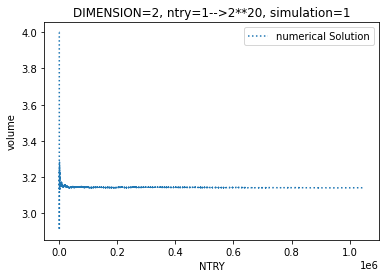

In [4]:
# Code4. 2次元のときの体積の推移を求める. def, njit, NTRY=2**20, simulation=1. execution time_s=1
import random as rd
from numba import njit


@njit(cache=True)
def main():
    rd.seed(100)
    DIMENSION: int = 2
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    ni_num = [ ]
    numerical_volume_num = [ ]
    delimiter: int = 1
    for ni in range(1,NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
        if ni % delimiter == 0:
            ni_num.append(ni)
            numerical_volume: float = ncnt / ni * 2.0 ** DIMENSION
            numerical_volume_num.append(numerical_volume)
    return ni_num, numerical_volume_num


ni_num, numerical_volume_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(ni_num, numerical_volume_num, ":", label="numerical Solution", color="tab:blue") 
plt.title("DIMENSION=2, ntry=1-->2**20, simulation=1") 
plt.xlabel("NTRY")
plt.ylabel("volume")
plt.legend()
plt.show()

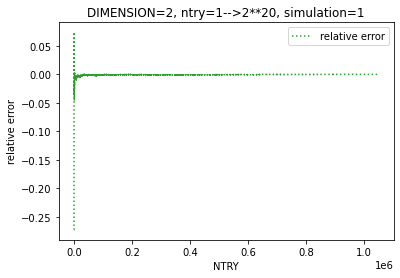

In [5]:
# Code5. 2次元のときの相対誤差の推移をグラフ化. def, njit, NTRY=2**20, simulation=1. execution time_s=1
import random as rd
import math as m
from numba import njit


@njit(cache=True)
def main():
    rd.seed(100)
    DIMENSION: int = 2
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.title("DIMENSION=2, ntry=1-->2**20, simulation=1") 
plt.xlabel("NTRY")
plt.ylabel("relative error")
plt.legend()
plt.show()

## 数値解と解析解の比較

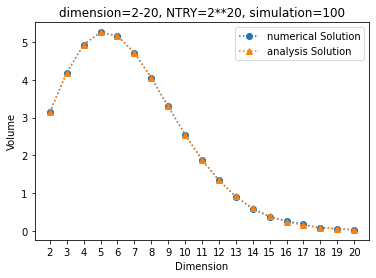

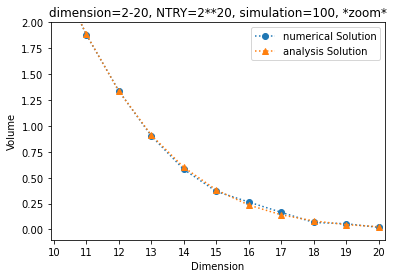

In [6]:
# Code6. 各次元ごとの超球体積における数値解と解析解をグラフ化. NTRY=2**20, simulation=100. execution time_s=161s
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 2
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    rd.seed(si)
    numerical_volume: float = 0.0
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


def NumericalSimulations_f(dimension):
    numerical_volume_num=[ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume=CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
    return numerical_volume_num


def AverageNumericalSolution_f():
    average_numerical_volume_num = [ ]
    dimension_num=[i for i in range(FIRST_DIMENSION, LAST_DIMENSION+1)]
    for dimension in range(FIRST_DIMENSION, LAST_DIMENSION+1):
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume_num.append(np.average(numerical_volume_num))
    return dimension_num, average_numerical_volume_num


def AnalysisSolution_f():
    analysis_volume_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        analysis_volume = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        analysis_volume_num.append(analysis_volume)
    return analysis_volume_num


dimension_num, average_numerical_volume_num = AverageNumericalSolution_f()
analysis_volume_num = AnalysisSolution_f()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(dimension_num,analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.title("dimension=2-20, NTRY=2**20, simulation=100")
plt.xlabel("Dimension")
plt.ylabel("Volume")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dimension_num, average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(dimension_num, analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.title("dimension=2-20, NTRY=2**20, simulation=100, *zoom*")
plt.xlabel("Dimension")
plt.ylabel("Volume")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.xlim([9.9,20.2])
plt.ylim([-0.1,2])
plt.legend()
plt.show()

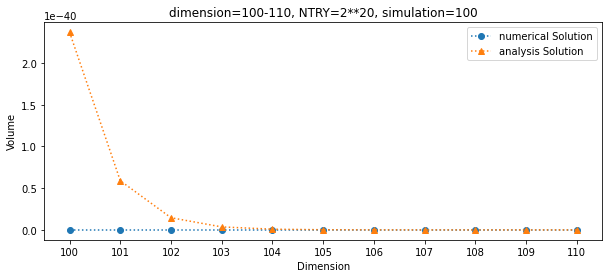

In [7]:
# Code7. 各次元ごとの超球体積における数値解と解析解をグラフ化. def, njit, dimension=100-110, NTRY=2**20,simulation=100. execution time_s=885s
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 100
LAST_DIMENSION: int = 110


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    rd.seed(si)
    numerical_volume: float = 0.0
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


def NumericalSimulations_f(dimension):
    numerical_volume_num=[ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume=CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
    return numerical_volume_num


def AverageNumericalSolution_f():
    average_numerical_volume_num = [ ]
    inum=[i for i in range(FIRST_DIMENSION, LAST_DIMENSION+1)]
    for dimension in range(FIRST_DIMENSION, LAST_DIMENSION+1):
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume_num.append(np.average(numerical_volume_num))
    return inum, average_numerical_volume_num


def AnalysisSolution_f():
    analysis_volume_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        analysis_volume = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        analysis_volume_num.append(analysis_volume)
    return analysis_volume_num


inum, average_numerical_volume_num = AverageNumericalSolution_f()
analysis_volume_num = AnalysisSolution_f()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(inum,average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(inum,analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.title("dimension=100-110, NTRY=2**20, simulation=100")
plt.xlabel("Dimension")
plt.ylabel("Volume")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

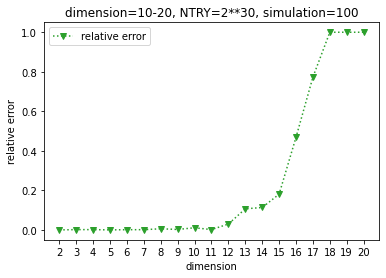

In [8]:
# Code8*. 各次元ごとの解析解と数値解との相対誤差をグラフ化. dimension=2-20, NTRY=2**20, simulation=100. execution time_s=2.5s
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 2
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    rd.seed(si)
    for i in range(NTRY):
        sum: float = 0.0
        for _ in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume

@njit(cache=True)
def NumericalSimulations_f(dimension):
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
        return numerical_volume_num

@njit(cache=True)
def CalculateRelativeError_f():
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        dimension_num.append(dimension)
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume: float = np.average(numerical_volume_num)
        analysis_volume: float = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        # print("dimension :", dimension, ", analysis_volume = ", analysis_volume, ", average_numerical_volume = ", average_numerical_volume)
        relative_error: float = m.fabs((analysis_volume - average_numerical_volume) / analysis_volume)
        relative_error_num.append(relative_error)
        # print("dimension :", dimension, ", RelativeError = ", relative_error)
    return dimension_num, relative_error_num
    

def main():
    dimension_num, relative_error_num = CalculateRelativeError_f()
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

# print(relative_error_num)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,relative_error_num, ":", label="relative error", marker="v", color="tab:green")
plt.title("dimension=10-20, NTRY=2**30, simulation=100")
plt.xlabel("dimension")
plt.ylabel("relative error")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

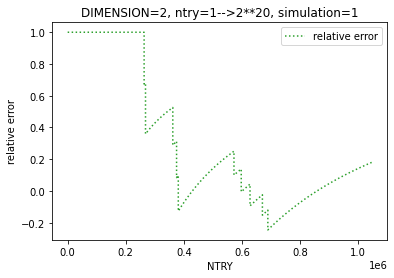

In [9]:
# Code9. 15次元のときの相対誤差の推移をグラフ化, def, njit, NTRY=2**20, simulation=1. execution time_s=1
import random as rd
import math as m
from numba import njit


@njit(cache=True)
def main():
    rd.seed(100)
    DIMENSION: int = 15
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.title("DIMENSION=2, ntry=1-->2**20, simulation=1") 
plt.xlabel("NTRY")
plt.ylabel("relative error")
plt.legend()
plt.show()

## MC の精度

### ゆらぎ

### 次元の呪い

### サンプル点の総数と実行時間

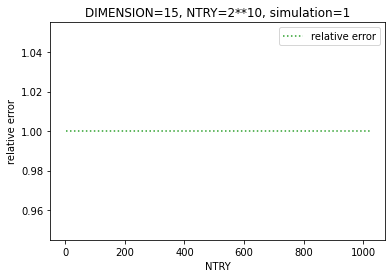

In [10]:
# Code10. 15次元のときの相対誤差の推移をグラフ化[実行時間の確認], def, NTRY=2**10, simulation=1. execution time_s=0.494
import random as rd
import math as m


def main():
    rd.seed(100)
    DIMENSION: int = 15
    NTRY: int = 2 ** 10
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.title("DIMENSION=15, NTRY=2**10, simulation=1")
plt.xlabel("NTRY")
plt.ylabel("relative error")
plt.legend()
plt.show()

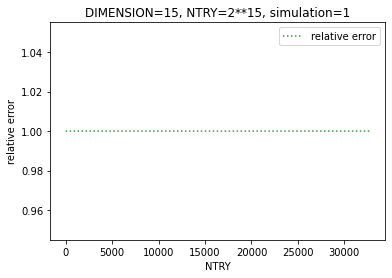

In [11]:
# Code11. 15次元のときの相対誤差の推移をグラフ化[実行時間の確認], def, NTRY=2**15, simulation=1. execution time_s=0.961
import random as rd
import math as m


def main():
    rd.seed(100)
    DIMENSION: int = 15
    NTRY: int = 2 ** 15
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num
    

dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.title("DIMENSION=15, NTRY=2**15, simulation=1")
plt.xlabel("NTRY")
plt.ylabel("relative error")
plt.legend()
plt.show()

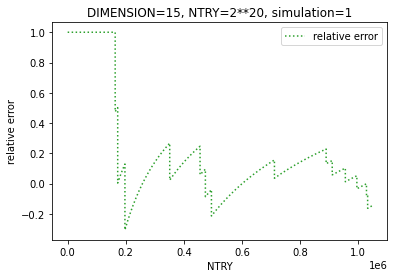

In [12]:
# Code12. 15次元のときの相対誤差の推移をグラフ化[実行時間の確認], def, NTRY=2**20, simulation=1. execution time_s=8.537
import random as rd
import math as m


def main():
    rd.seed(100)
    DIMENSION: int = 15
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.title("DIMENSION=15, NTRY=2**20, simulation=1")
plt.xlabel("NTRY")
plt.ylabel("relative error")
plt.legend()
plt.show()

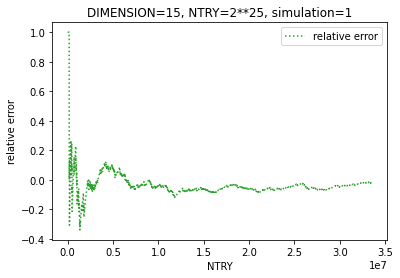

In [13]:
# Code13. 15次元のときの相対誤差の推移をグラフ化[実行時間の確認], def, NTRY=2**25, simulation=1. execution time_s=180.021
import random as rd
import math as m


def main():
    rd.seed(100)
    DIMENSION: int = 15
    NTRY: int = 2 ** 25
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.title("DIMENSION=15, NTRY=2**25, simulation=1")
plt.xlabel("NTRY")
plt.ylabel("relative error")
plt.legend()
plt.show()

In [14]:
# # CodeA. 15次元のときの相対誤差の推移をグラフ化[実行時間の確認], def, NTRY=2**30, simulation=1. execution time_s=?=4800
# import random as rd
# import math as m
# from tqdm.auto import tqdm


# def main():
#     rd.seed(100)
#     DIMENSION: int = 15
#     NTRY: int = 2 ** 30
#     ncnt: float = 0.0
#     dimension_num = [ ]
#     relative_error_num = [ ]
#     delimiter: int = 1
#     for ni in tqdm(range(1, NTRY)): # tqdm関数で実行時間を推測
#         sum: float = 0.0
#         for di in range(DIMENSION):
#             x: float = rd.random()
#             sum += x * x
#         if sum < 1:
#             ncnt += 1.0
#         if ni % delimiter == 0:
#             dimension_num.append(ni)
#             numerical_volume = ncnt / ni * 2 ** DIMENSION
#             analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
#             relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
#             relative_error_num.append(relative_error)
#     return dimension_num, relative_error_num


# dimension_num, relative_error_num = main()

# import matplotlib.pyplot as plt
# plt.figure(figsize=(6,4))
# plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
# plt.title("DIMENSION=15, NTRY=2**30, simulation=1")
# plt.xlabel("NTRY")
# plt.ylabel("relative error")
# plt.legend()
# plt.show()

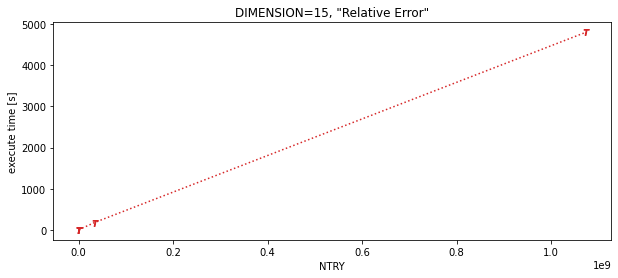

In [15]:
# Code14. 15次元の相対誤差の実行時間推移のグラフ
NTRY_num=[2**i for i in range(10,31,5)]
execution_time_num=[0.494, 0.961, 8.537, 180.021, 4800]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(NTRY_num, execution_time_num, ":", marker="$T$", color="tab:red")
plt.title("DIMENSION=15, \"Relative Error\"")
plt.xlabel("NTRY")
plt.ylabel("execute time [s]")
plt.show()

In [17]:
# CodeB1. 20次元球の体積を計算. def, dimension=2, NTRY=2**20, simulation=100. execution time_s=69
import random as rd
import numpy as np


def CalculateNumericalVolume_f(dimension, si):
    rd.seed(si)
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


def main():
    dimension: int = 2
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED, LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(dimension, si)
        numerical_volume_num.append(numerical_volume)
    average_numerical_volume: float = np.average(numerical_volume_num)
    return dimension, average_numerical_volume


dimension, average_numerical_volume = main()

print("d=", dimension, ",V=", average_numerical_volume, "pi=", np.pi)

d= 2 ,V= 3.1415948104858398 pi= 3.141592653589793


In [18]:
# CodeB2. 20次元球の体積を計算. def, njit, dimension=2, NTRY=2**20, simulation=100. execution time_s=1.9
import random as rd
import numpy as np
from numba import njit


@njit(cache=True)
def CalculateNumericalVolume_f(dimension, si):
    rd.seed(si)
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


@njit(cache=True)
def main():
    dimension: int = 2
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED, LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(dimension, si)
        numerical_volume_num.append(numerical_volume)
    average_numerical_volume: float = np.average(numerical_volume_num)
    return dimension, average_numerical_volume


dimension, average_numerical_volume = main()

print("d=", dimension, ",V=", average_numerical_volume, "pi=", np.pi)

d= 2 ,V= 3.1419740295410157 pi= 3.141592653589793


### 他のアルゴリズムを検討

# 結果と考察

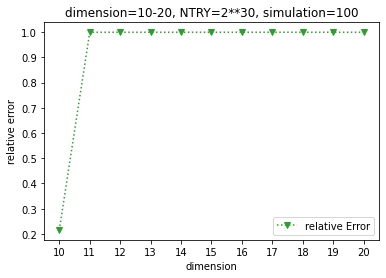

In [19]:
# CodeC1. 各次元ごとの解析解と数値解との相対誤差をグラフ化. NTRY=2**10, simulation=100. execution time_s=1.3
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 10
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    NTRY: int = 2 ** 10
    ncnt: float = 0.0
    rd.seed(si)
    for i in range(NTRY):
        sum: float = 0.0
        for _ in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume

@njit(cache=True)
def NumericalSimulations_f(dimension):
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
        return numerical_volume_num

@njit(cache=True)
def CalculateRelativeError_f():
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        dimension_num.append(dimension)
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume: float = np.average(numerical_volume_num)
        analysis_volume: float = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        # print("dimension :", dimension, ", analysis_volume = ", analysis_volume, ", average_numerical_volume = ", average_numerical_volume)
        relative_error: float = m.fabs((analysis_volume - average_numerical_volume) / analysis_volume)
        relative_error_num.append(relative_error)
        # print("dimension :", dimension, ", RelativeError = ", relative_error)
    return dimension_num, relative_error_num
    

def main():
    dimension_num, relative_error_num = CalculateRelativeError_f()
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

# print(relative_error_num)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,relative_error_num, ":", label="relative Error", marker="v", color="tab:green")
plt.title("dimension=10-20, NTRY=2**30, simulation=100")
plt.xlabel("dimension")
plt.ylabel("relative error")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

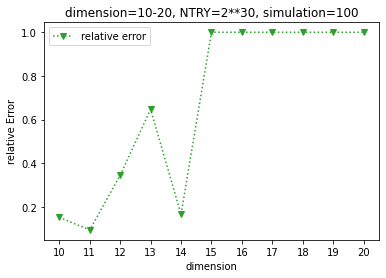

In [20]:
# CodeC2. 各次元ごとの解析解と数値解との相対誤差をグラフ化. dimesnsion=10-20, NTRY=2**15, simulation=100. execution time_s=1.3
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 10
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    NTRY: int = 2 ** 15
    ncnt: float = 0.0
    rd.seed(si)
    for i in range(NTRY):
        sum: float = 0.0
        for _ in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume

@njit(cache=True)
def NumericalSimulations_f(dimension):
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
        return numerical_volume_num

@njit(cache=True)
def CalculateRelativeError_f():
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        dimension_num.append(dimension)
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume: float = np.average(numerical_volume_num)
        analysis_volume: float = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        # print("dimension :", dimension, ", analysis_volume = ", analysis_volume, ", average_numerical_volume = ", average_numerical_volume)
        relative_error: float = m.fabs((analysis_volume - average_numerical_volume) / analysis_volume)
        relative_error_num.append(relative_error)
        # print("dimension :", dimension, ", RelativeError = ", relative_error)
    return dimension_num, relative_error_num
    

def main():
    dimension_num, relative_error_num = CalculateRelativeError_f()
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

# print(relative_error_num)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,relative_error_num, ":", label="relative error", marker="v", color="tab:green")
plt.title("dimension=10-20, NTRY=2**30, simulation=100")
plt.xlabel("dimension")
plt.ylabel("relative Error")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

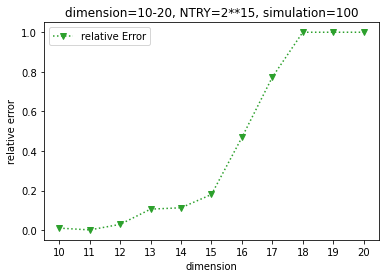

In [21]:
# CodeC3. 各次元ごとの解析解と数値解との相対誤差をグラフ化. dimesnsion=10-20, NTRY=2**20, simulation=100. execution time_s=2.4
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 10
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    rd.seed(si)
    for i in range(NTRY):
        sum: float = 0.0
        for _ in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume

@njit(cache=True)
def NumericalSimulations_f(dimension):
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
        return numerical_volume_num

@njit(cache=True)
def CalculateRelativeError_f():
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        dimension_num.append(dimension)
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume: float = np.average(numerical_volume_num)
        analysis_volume: float = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        # print("dimension :", dimension, ", analysis_volume = ", analysis_volume, ", average_numerical_volume = ", average_numerical_volume)
        relative_error: float = m.fabs((analysis_volume - average_numerical_volume) / analysis_volume)
        relative_error_num.append(relative_error)
        # print("dimension :", dimension, ", RelativeError = ", relative_error)
    return dimension_num, relative_error_num
    

def main():
    dimension_num, relative_error_num = CalculateRelativeError_f()
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

# print(relative_error_num)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,relative_error_num, ":", label="relative Error", marker="v", color="tab:green")
plt.title("dimension=10-20, NTRY=2**15, simulation=100")
plt.xlabel("dimension")
plt.ylabel("relative error")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

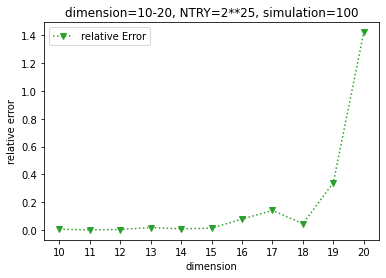

In [22]:
# CodeC4. 各次元ごとの解析解と数値解との相対誤差をグラフ化. dimesnsion=10-20, NTRY=2**25, simulation=100. execution time_s=2.7
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 10
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    NTRY: int = 2 ** 25
    ncnt: float = 0.0
    rd.seed(si)
    for i in range(NTRY):
        sum: float = 0.0
        for _ in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume

@njit(cache=True)
def NumericalSimulations_f(dimension):
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
        return numerical_volume_num

@njit(cache=True)
def CalculateRelativeError_f():
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        dimension_num.append(dimension)
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume: float = np.average(numerical_volume_num)
        analysis_volume: float = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        # print("dimension :", dimension, ", analysis_volume = ", analysis_volume, ", average_numerical_volume = ", average_numerical_volume)
        relative_error: float = m.fabs((analysis_volume - average_numerical_volume) / analysis_volume)
        relative_error_num.append(relative_error)
        # print("dimension :", dimension, ", RelativeError = ", relative_error)
    return dimension_num, relative_error_num
    

def main():
    dimension_num, relative_error_num = CalculateRelativeError_f()
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

# print(relative_error_num)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,relative_error_num, ":", label="relative Error", marker="v", color="tab:green")
plt.title("dimension=10-20, NTRY=2**25, simulation=100")
plt.xlabel("dimension")
plt.ylabel("relative error")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

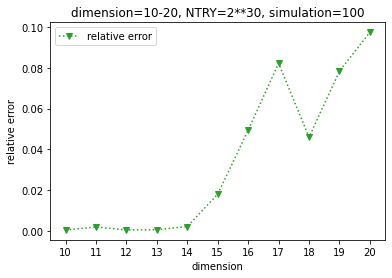

In [23]:
# CodeC5. 各次元ごとの解析解と数値解との相対誤差をグラフ化. dimesion=10-20, NTRY=2**30, simulation=100. execution time_s=1195
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 10
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    NTRY: int = 2 ** 30
    ncnt: float = 0.0
    rd.seed(si)
    for i in range(NTRY):
        sum: float = 0.0
        for _ in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume

@njit(cache=True)
def NumericalSimulations_f(dimension):
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume = CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
        return numerical_volume_num

@njit(cache=True)
def CalculateRelativeError_f():
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        dimension_num.append(dimension)
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume: float = np.average(numerical_volume_num)
        analysis_volume: float = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        # print("dimension :", dimension, ", analysis_volume = ", analysis_volume, ", average_numerical_volume = ", average_numerical_volume)
        relative_error: float = m.fabs((analysis_volume - average_numerical_volume) / analysis_volume)
        relative_error_num.append(relative_error)
        # print("dimension :", dimension, ", RelativeError = ", relative_error)
    return dimension_num, relative_error_num
    

def main():
    dimension_num, relative_error_num = CalculateRelativeError_f()
    return dimension_num, relative_error_num


dimension_num, relative_error_num = main()

# print(relative_error_num)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,relative_error_num, ":", label="relative error", marker="v", color="tab:green")
plt.title("dimension=10-20, NTRY=2**30, simulation=100")
plt.xlabel("dimension")
plt.ylabel("relative error")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

In [24]:
# CodeC6. 各次元,各サンプル点の総数ごとに解析解と数値解との相対誤差をtabel化. NTRY=2*10-2**30, simulation=100. execution time_s=0.3
import pandas as pd

i10_num = [0.033263732104414294, 0.0649703809235029, 0.016378123412200834, 0.09830579924799727, 0.09292559406626424, 0.17985355796824742, 0.32244517119083377, 0.09049813462405956, 0.21573672566718738, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
i15_num = [0.0006633909779249858, 0.0033387963117393043, 0.00529611895132014, 0.0007643522382241023, 0.015923334645784038, 0.027663334118415768, 0.0009332698317228344, 0.1321403428377592, 0.15188668417631854, 0.09468486454572125, 0.34469827182361296, 0.6472135237558793, 0.1656439259525315, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
i20_num = [2.9549422947802508e-05, 0.0015246980681839174, 0.001526876920680194, 0.00012081368397722892, 0.0010652669027548783, 0.0012845060780169728, 0.005805601253379658, 0.0024197475962788734, 0.010863262889816889, 0.0017220411387030559, 0.029759858562893943, 0.10672158627348134, 0.1134966713245647, 0.18074320427010196, 0.46883242606639175, 0.7732872543477504, 1.0, 1.0, 1.0]
i25_num = [0.00012052501131553322, 0.00016623036051146455, 0.00018945693129115843, 0.0001899038330648285, 0.0006537320872372532, 0.0017471367240486976, 0.002277296439162892, 0.004033474562531739, 0.006369084446597451, 0.0010417504735911907, 0.0039742845310076795, 0.017980102490409076, 0.008723456709732444, 0.01383028471574883, 0.07875623895889816, 0.14106398617530844, 0.046157069395586316, 0.3405803022436725, 1.421833728652197]
i30_num = [1.951267208688593e-06, 2.2111590329099127e-05, 3.9482131301577615e-05, 0.0001037831028682182, 2.767637215597141e-05, 0.0001384313425900941, 0.0002752380089617943, 5.11085937674066e-05, 0.0005769576416525477, 0.0019791748127185524, 0.0005745868445457106, 0.0006696844149080387, 0.0022254297600066758, 0.018091928320992313, 0.04944865309244419, 0.08218530780829328, 0.04597608160232043, 0.07835104220747517, 0.09739340829552663]

del i10_num[:8]
del i15_num[:8]
del i20_num[:8]
del i25_num[:8]
del i30_num[:8]

i10_num = [round(i,3) for i in i10_num]
i15_num = [round(i,3) for i in i15_num]
i20_num = [round(i,3) for i in i20_num]
i25_num = [round(i,3) for i in i25_num]
i30_num = [round(i,3) for i in i30_num]

NTRY_num=[i10_num, i15_num, i20_num, i25_num, i30_num]
df = pd.DataFrame(NTRY_num)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.216,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,0.152,0.095,0.345,0.647,0.166,1.000,1.000,1.000,1.000,1.000,1.000
2,0.011,0.002,0.030,0.107,0.113,0.181,0.469,0.773,1.000,1.000,1.000
3,0.006,0.001,0.004,0.018,0.009,0.014,0.079,0.141,0.046,0.341,1.422
4,0.001,0.002,0.001,0.001,0.002,0.018,0.049,0.082,0.046,0.078,0.097


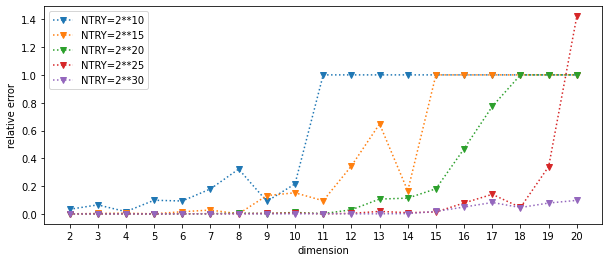

In [25]:
# Code15. 各次元,各サンプル点の総数ごとに解析解と数値解との相対誤差をグラフ化. NTRY=2*10-2**30, simulation=100. execution time_s=0.5

i10_num = [0.033263732104414294, 0.0649703809235029, 0.016378123412200834, 0.09830579924799727, 0.09292559406626424, 0.17985355796824742, 0.32244517119083377, 0.09049813462405956, 0.21573672566718738, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
i15_num = [0.0006633909779249858, 0.0033387963117393043, 0.00529611895132014, 0.0007643522382241023, 0.015923334645784038, 0.027663334118415768, 0.0009332698317228344, 0.1321403428377592, 0.15188668417631854, 0.09468486454572125, 0.34469827182361296, 0.6472135237558793, 0.1656439259525315, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
i20_num = [2.9549422947802508e-05, 0.0015246980681839174, 0.001526876920680194, 0.00012081368397722892, 0.0010652669027548783, 0.0012845060780169728, 0.005805601253379658, 0.0024197475962788734, 0.010863262889816889, 0.0017220411387030559, 0.029759858562893943, 0.10672158627348134, 0.1134966713245647, 0.18074320427010196, 0.46883242606639175, 0.7732872543477504, 1.0, 1.0, 1.0]
i25_num = [0.00012052501131553322, 0.00016623036051146455, 0.00018945693129115843, 0.0001899038330648285, 0.0006537320872372532, 0.0017471367240486976, 0.002277296439162892, 0.004033474562531739, 0.006369084446597451, 0.0010417504735911907, 0.0039742845310076795, 0.017980102490409076, 0.008723456709732444, 0.01383028471574883, 0.07875623895889816, 0.14106398617530844, 0.046157069395586316, 0.3405803022436725, 1.421833728652197]
i30_num = [1.951267208688593e-06, 2.2111590329099127e-05, 3.9482131301577615e-05, 0.0001037831028682182, 2.767637215597141e-05, 0.0001384313425900941, 0.0002752380089617943, 5.11085937674066e-05, 0.0005769576416525477, 0.0019791748127185524, 0.0005745868445457106, 0.0006696844149080387, 0.0022254297600066758, 0.018091928320992313, 0.04944865309244419, 0.08218530780829328, 0.04597608160232043, 0.07835104220747517, 0.09739340829552663]
i_num = [i for i in range(2,21)]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(i_num, i10_num, ":", label="NTRY=2**10", marker="v")
plt.plot(i_num, i15_num, ":", label="NTRY=2**15", marker="v")
plt.plot(i_num, i20_num, ":", label="NTRY=2**20", marker="v")
plt.plot(i_num, i25_num, ":", label="NTRY=2**25", marker="v")
plt.plot(i_num, i30_num, ":", label="NTRY=2**30", marker="v")
plt.xlabel("dimension")
plt.ylabel("relative error")
plt.xticks([i for i in range(2,21)])
plt.legend()
plt.show()

# 結論

# あとがき